# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')
%matplotlib notebook

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [71]:
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R по явной формуле

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    V = np.pi**(D/2)*(R**D)/sp.gamma(1+D/2)
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

In [72]:
# Write your code and answer here
print(getSphereVolumeExact(5))
print(getSphereVolumeExact(4))
print(getSphereVolumeExact(3))
print(getSphereVolumeExact(2))
print(getSphereVolumeExact(1))
print(getSphereVolumeExact(0))

5.263789013914324
4.934802200544679
4.188790204786391
3.141592653589793
2.0
1.0


<IPython.core.display.Javascript object>


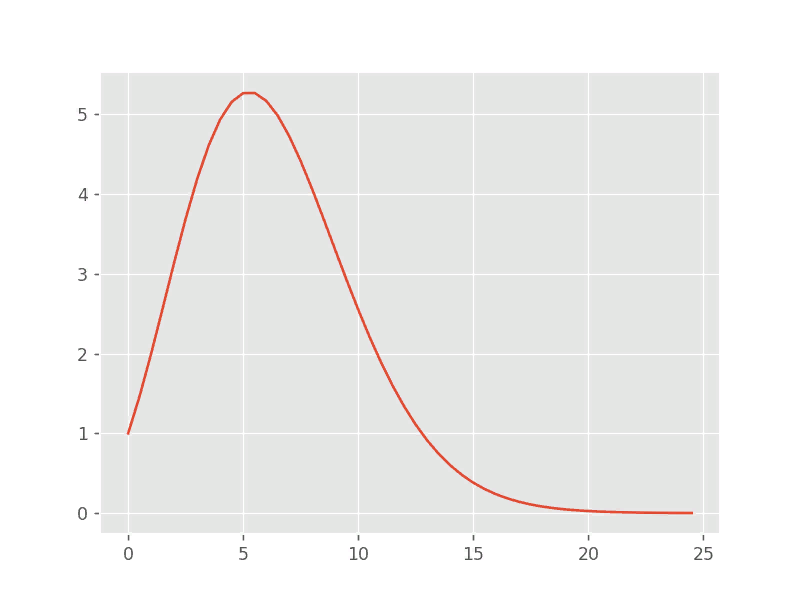

In [73]:
X = np.zeros(50)
for i in range(50):
    X[i] = i/2
plt.plot(X, getSphereVolumeExact(X, R=1))

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [74]:
def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на псевдослучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    x = np.random.rand(N, D)
    x = x*R
    j = 0
    for i in range(N):
        if np.linalg.norm(x[i]) <= R:
            j = j +1
    V = j/N * (2*R)**D
    return V

In [75]:
getSphereVolumePseudorandom(1000, 1, R = 1)

2.0

Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

<IPython.core.display.Javascript object>


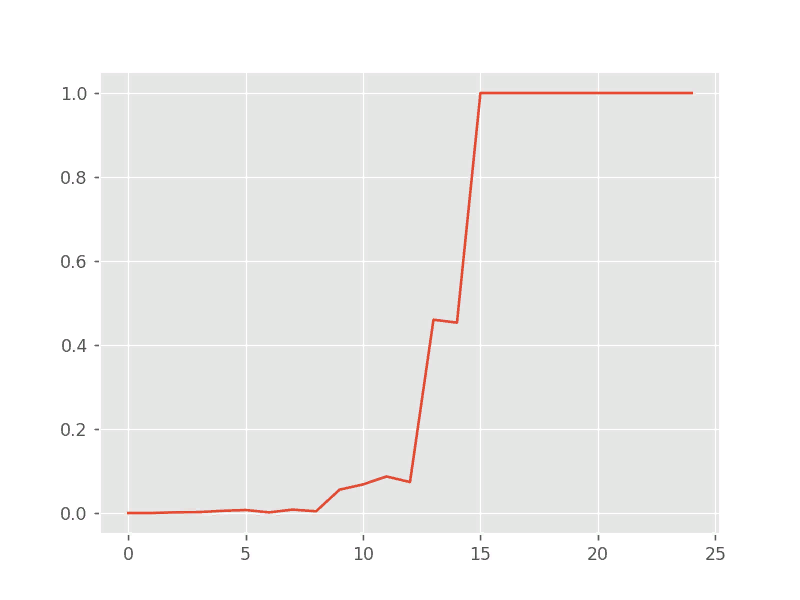

In [76]:
e = []
N = 100000
D = 25
for d in range(D):
    V1 = getSphereVolumeExact(d, R = 1.0)
    V2 = getSphereVolumePseudorandom(N, d, R = 1)
    e.append(abs((V1 - V2)/V1))
d0 = np.arange(D)
    
plt.figure()
plt.plot(d0, e)

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [77]:
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [78]:
sobol_seq.i4_sobol_generate?

In [79]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на квазислучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    x = sobol_seq.i4_sobol_generate(D,N) 
    x = x*R
    j = 0
    for i in range(N):
        if np.linalg.norm(x[i]) <= R:
            j = j +1
    V = j/N * (2*R)**D
    return V

In [80]:
getSphereVolumeQuasirandom(1000, 1, R = 1)

2.0

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

<IPython.core.display.Javascript object>


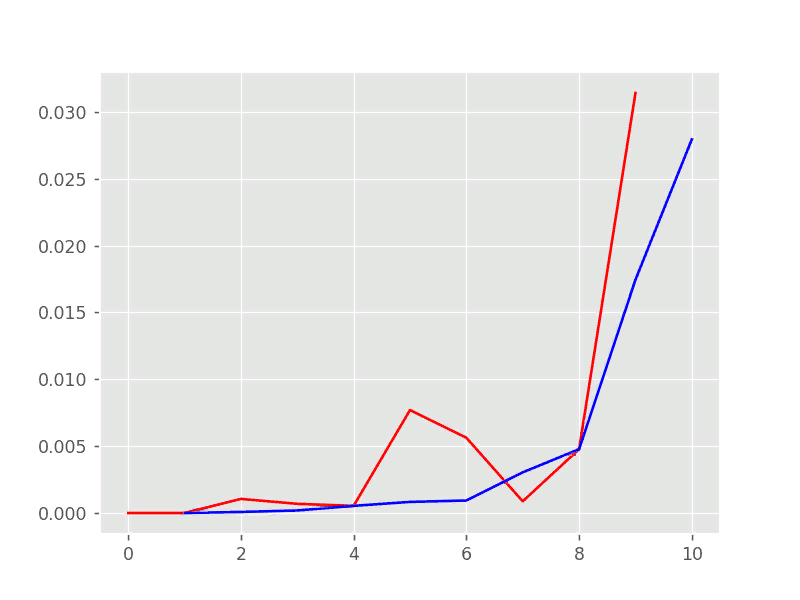

In [81]:
e = []
N = 100000
D = 10
for d in range(D):
    V1 = getSphereVolumeExact(d, R = 1.0)
    V2 = getSphereVolumePseudorandom(N, d, R = 1)
    e.append(abs((V1 - V2)/V1))
d0 = np.arange(D)

e1 = []
for d in range(1, D+1):
    V1 = getSphereVolumeExact(d, R = 1.0)
    V2 = getSphereVolumeQuasirandom(N, d, R = 1)
    e1.append(abs((V1 - V2)/V1))

plt.figure()
plt.plot(d0, e, "r")
plt.plot(d0+1, e1, "b")

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

Квазислучайные последовательности работают лучше, так как ее точки более упорядочены, чем точки псевдослучайной последовательности

## Задание 2

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [82]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    state = np.random.rand(N,N)
    for i in range(N):
        for j in range(N):
            if state[i,j] < 0.5:
                state[i,j] = 1
            else:
                state[i,j] = -1
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [101]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает и возвращает изменение энергии ячейки (i,j) в случае ее переворота (не меняя состояния state)
    
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    N = state.shape[0]
    i1 = i+1
    j1 = j+1
    if i1 >= N:
        i1 = 0
    if j1 >= N:
        j1 = 0    
    dE = state[i,j]*(state[i1,j] + state[i,j1] + state[i-1,j] +state[i,j-1])
    return 2*dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [102]:
def makeFlip(T, state):
    '''
    Функция N^2 раз переворачивает спин, и принимает решение оставить его перевернутым или нет, согласно правилам 4. и 5.
    
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    N = state.shape[0]
    for _ in range(N**2):
        i = int(np.random.rand()*N)
        j = int(np.random.rand()*N)
        dE = getDeltaE(i, j, state)
        if dE > 0:
            e = np.exp(-dE/T)
            if np.random.rand() <= e:
                state[i,j] = - state[i,j]
        else:
            state[i,j] = - state[i,j]
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [103]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    N = state.shape[0]
    E = 0
    for i in range(N):
        for j in range(N):
            dE = getDeltaE(i, j, state)
            E = E - dE/2
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [104]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    N = state.shape[0]
    M = 0
    for i in range(N):
        for j in range(N):
            M = M + state[i, j]
    return M

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [105]:
N       = 10         # размер решетки NxN
Nt      = 10         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

<IPython.core.display.Javascript object>


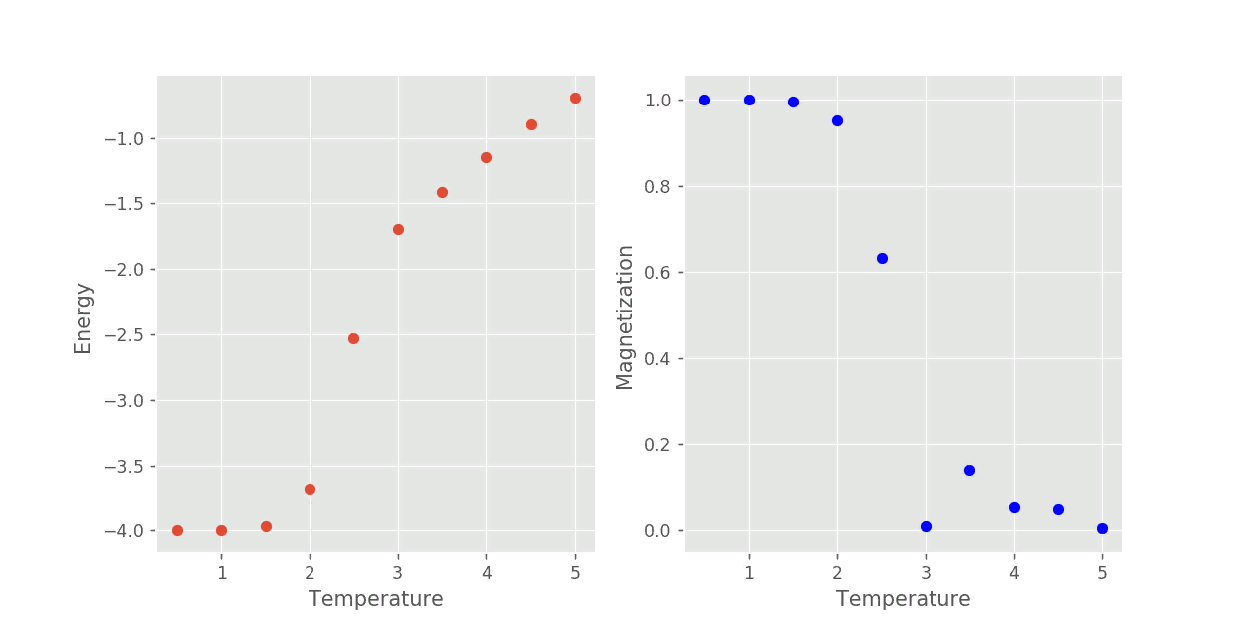

In [106]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

При увеличении температуры намагниченность пропадает. Так и ведет себя ферромагнетик, данные соответсвуют теоретическим.

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

In [109]:
N = 64
state = getInitialState(N)

<IPython.core.display.Javascript object>


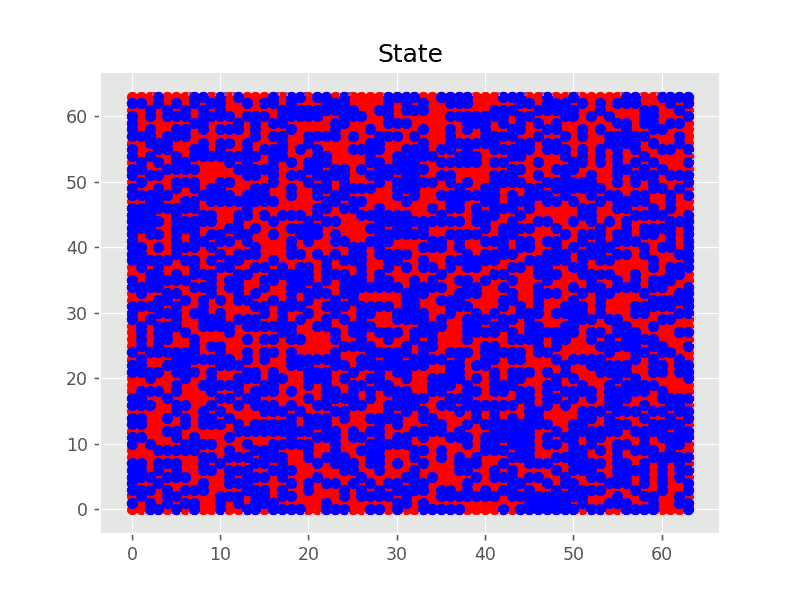

In [110]:
x = []
y = []
x1 = []
y1 = []
for i in range(N):
    for j in range(N):
        x.append(i)
        y.append(j)
        if state[i,j] == 1:
            x1.append(i)
            y1.append(j)

plt.figure()
plt.scatter(x, y, c='red')
plt.scatter(x1, y1, c='blue')
plt.title('State')
makeFlip(0.5, state);

<IPython.core.display.Javascript object>


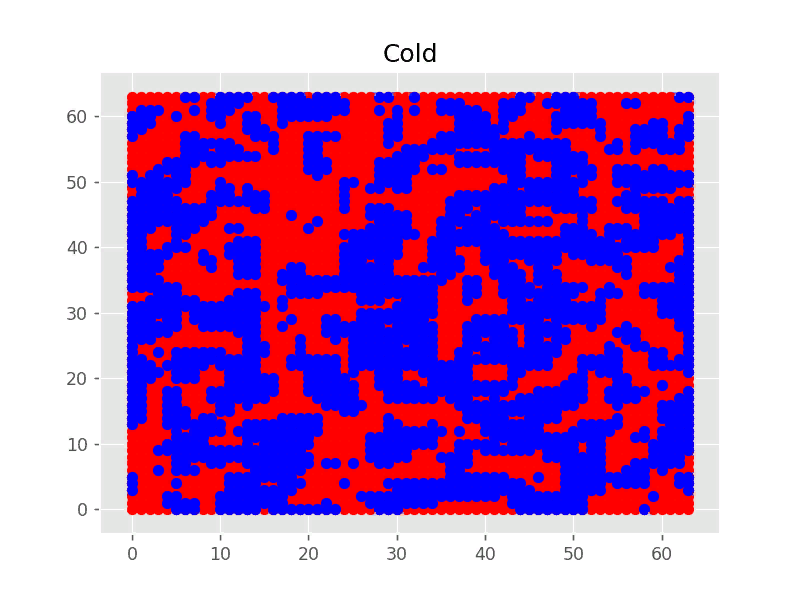

Text(0.5, 1.0, 'Cold')

In [111]:
makeFlip(0.5, state);
x = []
y = []
x1 = []
y1 = []
for i in range(N):
    for j in range(N):
        x.append(i)
        y.append(j)
        if state[i,j] == 1:
            x1.append(i)
            y1.append(j)

plt.figure()
plt.scatter(x, y, c='red')
plt.scatter(x1, y1, c='blue')
plt.title('Cold')

<IPython.core.display.Javascript object>


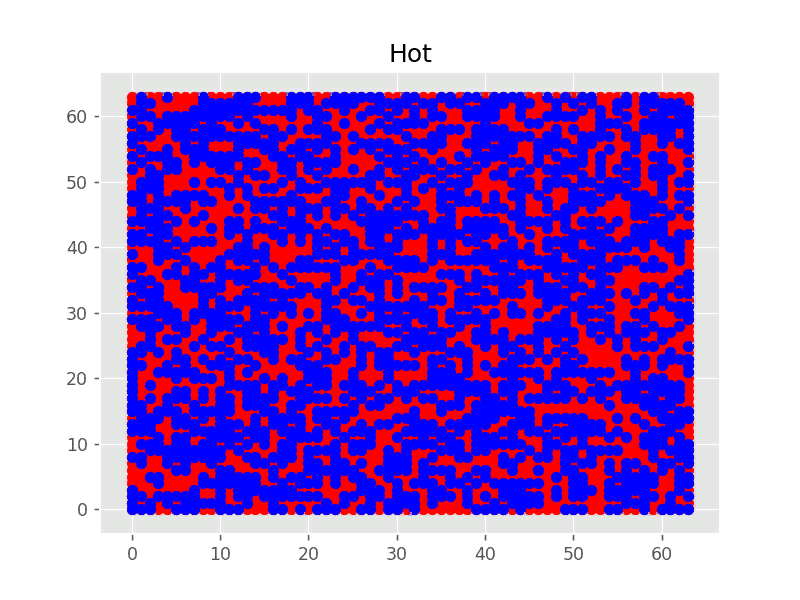

Text(0.5, 1.0, 'Hot')

In [112]:
makeFlip(1000, state);
x = []
y = []
x1 = []
y1 = []
for i in range(N):
    for j in range(N):
        x.append(i)
        y.append(j)
        if state[i,j] == 1:
            x1.append(i)
            y1.append(j)

plt.figure()
plt.scatter(x, y, c='red')
plt.scatter(x1, y1, c='blue')
plt.title('Hot')

При холодной температуре спины соседних частиц упорядочиваются, из-за чего возникает намагниченность образца. С увеличением температуры кинетическая энергия побеждает, спины направлены хаотически, всё как в жизни.